In [1]:
# parse xml file
import xml.etree.ElementTree as ET

In [2]:
xmlfile = 'slab-uniform-1depth-rates.xml'
root = ET.parse(xmlfile).getroot()
lon, lat, dep, upseis, lowseis = [], [], [], [], []
Nc5 = []
nodalplanedist = []

gml = '{http://openquake.org/xmlns/nrml/0.4}'

for elem in root:
     for pointsource in elem:
        # print(a.tag.title(), a.attrib.get('name', a.text))
        if (pointsource.attrib['tectonicRegion'])!='Subduction Intraslab':
            print('erroneous tectonic region')
        #print(list(pointsource))
        for item in list(pointsource):
            # print(list(item))
            for entry in list(item):
                if entry.tag == '{http://www.opengis.net/gml}'+'Point':
                    #  print('here')
                    for pos in entry:
                        lonlat = pos.text.split(' ')
                        lon.append(float(lonlat[0]))
                        lat.append(float(lonlat[1]))
                if entry.tag == gml+'upperSeismoDepth':
                    upseis.append(float(entry.text))
                if entry.tag == gml+'lowerSeismoDepth':
                    lowseis.append(float(entry.text))
            if item.tag == gml+'hypoDepthDist':
                for hypo in item:
                    dep.append(float(hypo.attrib['depth']))
            if item.tag == gml+'nodalPlaneDist':
                psdr = []
                for xxx in item:
                    psdr.append(xxx.attrib) 
                nodalplanedist.append(psdr)
           
            if item.tag == gml+'truncGutenbergRichterMFD':
                if item.attrib['minMag'] == '5.0':
                    avalue = float(item.attrib['aValue'])
                    bvalue = float(item.attrib['bValue'])
                    log10Ns = avalue - bvalue*5.0;
                    Ns = 10**log10Ns
                    Nc5.append(Ns)
# correct lon --
xlon = []
for x in lon:
    if x<0:
        xlon.append(360+x)
    else:
        xlon.append(x)
                    
# what do we have
#lon, lat, dep, upseis, lowseis = [], [], [], [], []
#Nc5 = [], nodalplanedist = []
klon, klat, kdep, kUppers, kLowers, knodalplanes = [],[],[],[],[],[]
kstrike1, kstrike2, kstrike3 = [],[],[]

for i, x in enumerate(xlon):
    if lat[i]< -43.0: # take only hikurangi eh!
        continue
    klon.append(xlon[i])
    klat.append(lat[i])
    kdep.append(dep[i])
    kUppers.append(upseis[i])
    kLowers.append(lowseis[i])
    knodalplanes.append(nodalplanedist[i])
    psdr = nodalplanedist[i][0]
    kstrike1.append(float(psdr['strike']))
    psdr = nodalplanedist[i][1]
    kstrike2.append(float(psdr['strike']))
    psdr = nodalplanedist[i][2]
    kstrike3.append(float(psdr['strike']))
    

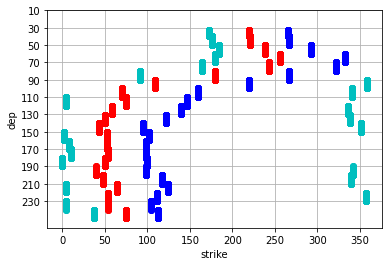

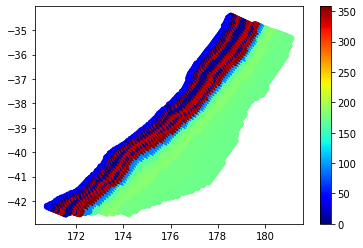

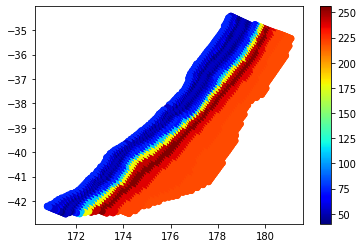

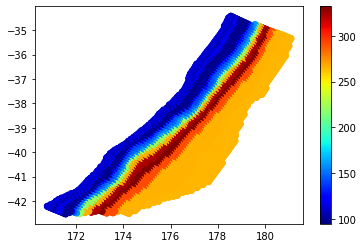

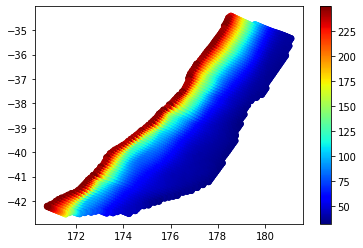

In [9]:
import matplotlib.pyplot as plt

plt.plot(kstrike1, kdep, 'co')
plt.plot(kstrike2, kdep, 'ro')
plt.plot(kstrike3, kdep, 'bo')
yy = [x for x in range(10, 250, 20)]
plt.yticks(yy)
plt.grid()
plt.xlabel('strike')
plt.ylabel('dep')
plt.gca().invert_yaxis()
plt.show()

plt.scatter(klon, klat, c= kstrike1, cmap='jet');
plt.colorbar()
plt.show()
plt.scatter(klon, klat, c= kstrike2, cmap='jet');
plt.colorbar()
plt.show()
plt.scatter(klon, klat, c= kstrike3, cmap='jet');
plt.colorbar()
plt.show()

plt.scatter(klon, klat, c= kdep, cmap='jet');
plt.colorbar()
plt.show()


In [4]:
import reckoner as rkn
import numpy as np
import matplotlib.pyplot as plt

# scaling relation
def mag2Area(mag):
    return 10**(mag-4.15)
mag = 8.0
# rupture dimns -----------------------------
A = mag2Area(mag)
clon, clat = [],[]
xr, yr, zr = [],[],[]
for i, x in enumerate(klon):
    Hseis = kLowers[i]-kUppers[i]
    W = round(np.sqrt(A))
    
    # lets pick the middle nodalplane
    psdr = knodalplanes[i][1]
    strike = float(psdr['strike'])
    dip = float(psdr['dip'])
    
    # Hseis, dip, strike
    W_max = Hseis/np.sin(np.deg2rad(dip)) 
    if W>W_max:
        W = W_max    
    L = round(A/W)
    # let's see -----------------------------------
    xh = (W/2)*np.sin(np.deg2rad(dip))
    ztop = kdep[i]-xh
    if ztop<20:
        ztop = 20
    xh = kdep[i]-ztop
    sx = xh/np.tan(np.deg2rad(dip))
    clonlat = rkn.reckon(klon[i],klat[i],sx,strike-90)
    clon.append(clonlat[0])
    clat.append(clonlat[1])
    
N = len(klon)
for i in range(0,N,15):
    plt.plot(klon[i], klat[i], 'b.')
    plt.plot(clon[i], clat[i], 'r.')

ModuleNotFoundError: No module named 'reckoner'

In [ ]:
# given a hypo, seismogenic volume, rupture length, rupture width
import reckoner as rkn
import numpy as np

mag = 8.0
uppers = 20
lowers = 80


for x, y in zip(lon, lat):
depth = 38.472
strike = 219 
dip = 59.0
rake = -90
hdepth = 37
Hseis = lowers-uppers





# let's see -----------------------------------
xh = (W/2)*np.sin(np.deg2rad(dip))
ztop = hdepth-xh

if ztop<20:
    ztop = 20
xh = hdepth-ztop
sx = xh/np.tan(np.deg2rad(dip))



newlonlat = rkn.reckon(lon,lat,sx,strike-90)

plt.plot(lon, lat, 'bo')
plt.plot(newlonlat[0], newlonlat[1], 'ro')

x = [1, 5, 6, 3, 1]
y = [2, 3, 5, 4, 2]
z = [2, 2, 10, 10, 2]

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
#
ax.plot(x,y,z, 'c-');


In [ ]:
fig, ax = plt.subplots(figsize=(9,8))

for i in enumerate(xlon):
    ax.
sc = ax.scatter(xlon, lat, c=dep)


ax.set_xlim([163, 182])
ax.set_ylim([-50, -34])
ax.set_title('hypocenter depth')
nzb.plot(file='nzborders.json',plinewidth= 0.2, pcolor = 'b', ax=ax)
fig.colorbar(sc, ax=ax);
plt.show()


In [ ]:
#{'probability': '0.32', 'strike': '173', 'dip': '59.0', 'rake': '-90'}

import numpy as np
deg2km = 111.19492664455873
km2deg = 0.008993216059187306

# scaling relation
def mag2Area(mag):
    return 10**(mag-4.15)

Hseis = 60
A = mag2Area(8.0)
dipAn = 60

RW_max = Hseis/np.sin(np.deg2rad(dipAn)) 
L = round(A/RW_max)

print(A, RW_max, L)